# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) (optional) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [2]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

from numpy import double


filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

data = list(lines)
dataset = [data[0]]
for sublist in data[1:]:
    dataset.append([float(x) for x in sublist])
dataset = np.array(dataset, dtype=object)
dataset

array([['km', 'year', 'powerPS', 'avgPrice'],
       [125000.0, 2001.0, 40.0, 1371.11],
       [150000.0, 2001.0, 40.0, 1298.7],
       ...,
       [20000.0, 2015.0, 260.0, 49492.38],
       [10000.0, 2015.0, 300.0, 38542.69],
       [20000.0, 2015.0, 300.0, 39683.32]], dtype=object)

In [3]:
dataset[:,2:3]

array([['powerPS'],
       [40.0],
       [40.0],
       ...,
       [260.0],
       [300.0],
       [300.0]], dtype=object)

In [4]:
dataset_year = np.array(dataset[1:,1:2].ravel().tolist())
dataset_km = np.array(dataset[1:,:1].ravel().tolist())
dataset_power = np.array(dataset[1:,2:3].ravel().tolist())
dataset_price = np.array(dataset[1:,-1:].ravel().tolist())

Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [5]:
# linear regression with linregress (estimate price from year)

slope_year, intercept_year, rvalue_year, pvalue_year, stderr_year = stats.linregress(dataset_year, dataset_price)
slope_km, intercept_km, rvalue_km, pvalue_km, stderr_km = stats.linregress(dataset_km, dataset_price)
slope_power, intercept_power, rvalue_power, pvalue_power, stderr_power = stats.linregress(dataset_power, dataset_price)

In [6]:
print('slope (linregress): ', slope_year,'  intercept (linregress):', intercept_year);
print('correlation coefficient:', rvalue_year)

slope (linregress):  1509.093825335221   intercept (linregress): -3018309.484956958
correlation coefficient: 0.676704316909544


In [7]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

reg = linear_model.LinearRegression().fit(dataset[1:,1:2].ravel().reshape(-1, 1), dataset[1:,-1:].ravel().reshape(-1, 1))
reg.score(dataset[1:,1:2].ravel().reshape(-1, 1), dataset[1:,-1:].ravel().reshape(-1, 1))

0.45792873252401367

In [8]:
reg.coef_, reg.intercept_

(array([[1509.09382534]]), array([-3018309.48495696]))

In [9]:
slope_year, intercept_year

(1509.093825335221, -3018309.484956958)

In [10]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

new_dataset_year = np.array([np.array([1, x]) for x in dataset_year]) # use of homogeneous coordinates
all_matrices = [new_dataset_year[i]*new_dataset_year[i].reshape(2, 1) for i in range(new_dataset_year.shape[0])]
A_matrix = all_matrices[0]
for j in range(1, len(all_matrices)):
    A_matrix += all_matrices[j]
A_matrix = np.matrix(A_matrix)
all_b_vectors = np.array([new_dataset_year[i]*dataset_price[i] for i in range(dataset_price.shape[0])])
b_vector = all_b_vectors[0]
for k in range(1, all_b_vectors.shape[0]):
    b_vector += all_b_vectors[k]
w = np.linalg.inv(A_matrix)*b_vector.reshape(2, 1)
# np.linalg.det(A_matrix)
w

matrix([[-3.01830948e+06],
        [ 1.50909383e+03]])

In [11]:
# Basically we have:
print(f"Slope (least square) is {w[1]}, and the intercepet (least squares) is {w[0]}.\nSame results as before")

Slope (least square) is [[1509.09382527]], and the intercepet (least squares) is [[-3018309.48483467]].
Same results as before


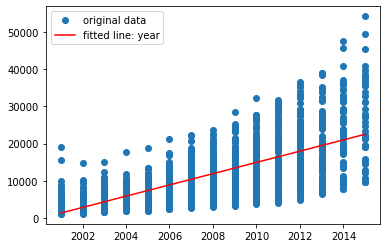

In [12]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

plt.plot(dataset_year, dataset_price, 'o', label='original data')
plt.plot(dataset_year, intercept_year + slope_year*dataset_year, 'r', label='fitted line: year')
plt.legend()
plt.show()

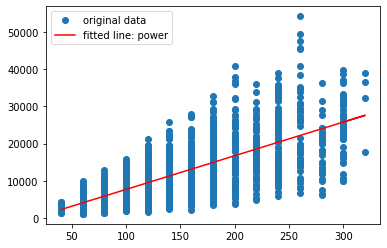

In [13]:
# linear regression with linregress (estimate price from power)

plt.plot(dataset_power, dataset_price, 'o', label='original data')
plt.plot(dataset_power, intercept_power + slope_power*dataset_power, 'r', label='fitted line: power')
plt.legend()
plt.show()

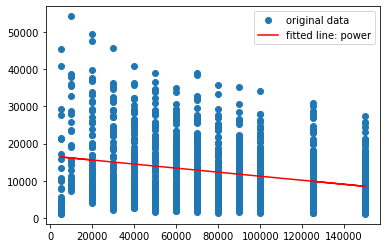

In [14]:
# linear regression with linregress (estimate price from km)

plt.plot(dataset_km, dataset_price, 'o', label='original data')
plt.plot(dataset_km, intercept_km + slope_km*dataset_km, 'r', label='fitted line: power')
plt.legend()
plt.show()

In [15]:
# Have a look at the correlation coefficients to see which of the 3 features works better

rvalue_year, rvalue_km, rvalue_power 

(0.676704316909544, -0.2572867429988497, 0.7085500315263967)

slope coefficients [[1325.2284004    80.43004469]]
intercept [-2661196.78674901]


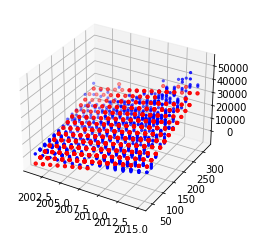

correlation coefficient: 0.9214943735217704
Much better correlation than the two features alone!


In [16]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)

X = np.vstack((dataset_year, dataset_power)).T
reg = linear_model.LinearRegression().fit(X, dataset[1:,-1:].ravel().reshape(-1, 1))
print(f"slope coefficients {reg.coef_}\nintercept {reg.intercept_}")

# 3D plot (blue real data, red estimated ones)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_year, dataset_power, dataset_price, zdir='z', s=5, c='b', depthshade=True)
ax.scatter(dataset_year, dataset_power, reg.intercept_+reg.coef_[:,0]*dataset_year+reg.coef_[:,1]*dataset_power, zdir='z', s=10, c='r', depthshade=True)
plt.show()

print('correlation coefficient:', np.sqrt(reg.score(X.reshape(-1,2), dataset_price.reshape(-1,1))))
print('Much better correlation than the two features alone!')